### Univariate Time Series Forecasting

In [23]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 14.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 14.2 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.3 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.9 MB/s eta 0:00:00


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [27]:
df = pd.read_csv("Downloads/SeriesReport-202508260039.csv",skiprows=7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  144 non-null    object 
 1   Value   139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [31]:
df

,Period,Value
0,Jan-2014,7071.0
1,Feb-2014,7100.0
2,Mar-2014,7966.0
3,Apr-2014,7654.0
4,May-2014,8244.0
...,...,...
139,Aug-2025,NaN
140,Sep-2025,NaN
141,Oct-2025,NaN
142,Nov-2025,NaN


In [33]:
df.columns=["Date","Sales"]
df

,Date,Sales
0,Jan-2014,7071.0
1,Feb-2014,7100.0
2,Mar-2014,7966.0
3,Apr-2014,7654.0
4,May-2014,8244.0
...,...,...
139,Aug-2025,NaN
140,Sep-2025,NaN
141,Oct-2025,NaN
142,Nov-2025,NaN


In [35]:
df.dropna(inplace=True)
df

,Date,Sales
0,Jan-2014,7071.0
1,Feb-2014,7100.0
2,Mar-2014,7966.0
3,Apr-2014,7654.0
4,May-2014,8244.0
...,...,...
134,Mar-2025,11549.0
135,Apr-2025,11219.0
136,May-2025,11766.0
137,Jun-2025,11044.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    139 non-null    object 
 1   Sales   139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [39]:
df["Date"]=pd.to_datetime(df["Date"])

C:\Users\acer\AppData\Local\Temp\ipykernel_7632\1380596044.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"]=pd.to_datetime(df["Date"])


In [41]:
df.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object

In [43]:
df.head()

,Date,Sales
0,2014-01-01,7071.0
1,2014-02-01,7100.0
2,2014-03-01,7966.0
3,2014-04-01,7654.0
4,2014-05-01,8244.0


In [45]:
df.tail()

,Date,Sales
134,2025-03-01,11549.0
135,2025-04-01,11219.0
136,2025-05-01,11766.0
137,2025-06-01,11044.0
138,2025-07-01,11795.0


In [47]:
df.set_index("Date",inplace=True)

In [49]:
df

,Sales
Date,
2014-01-01,7071.0
2014-02-01,7100.0
2014-03-01,7966.0
2014-04-01,7654.0
2014-05-01,8244.0
...,...
2025-03-01,11549.0
2025-04-01,11219.0
2025-05-01,11766.0


#### Checking Stationarity of given series

In [57]:
from statsmodels.tsa.stattools import adfuller

# function to test stationarity of given series
def check_stationarity(series):
    result = adfuller(series)
    test_statistic,p_value=result[0],result[1]
    print('ADF Test Statistic:',test_statistic)
    print('p-value:',p_value)
    if p_value<=0.05:
        print("p-value is less than 0.05 hence given series is stationary")
    else:
        print("p-value is more than or equal to 0.05hence given series is not stationary")

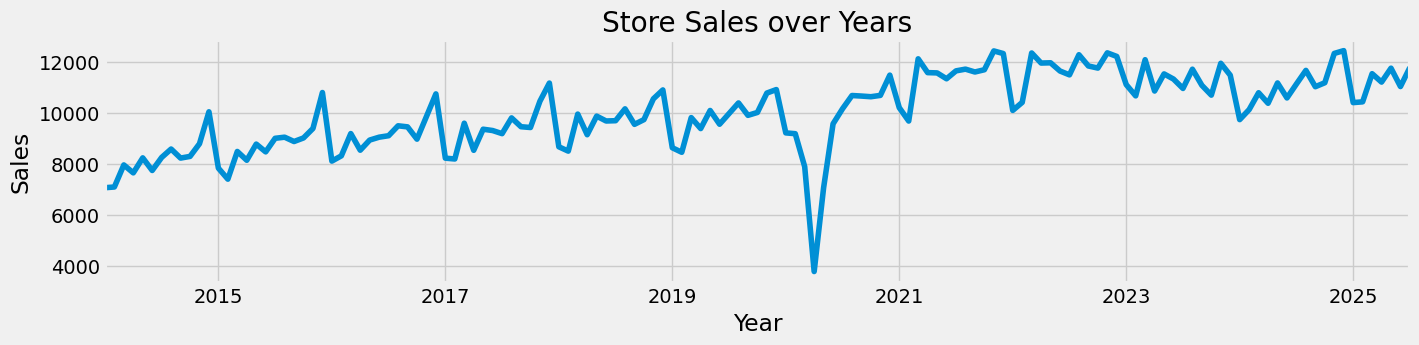

ADF Test Statistic: -1.4019056439250397
p-value: 0.5813621886476237
p-value is more than or equal to 0.05hence given series is not stationary


In [59]:
# plotting the sales trend over years
plt.figure(figsize=(15,3))
df["Sales"].plot()
plt.title("Store Sales over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()
# cheking if given series is stationary using ADF Test
check_stationarity(df["Sales"])

### Making to Stationary

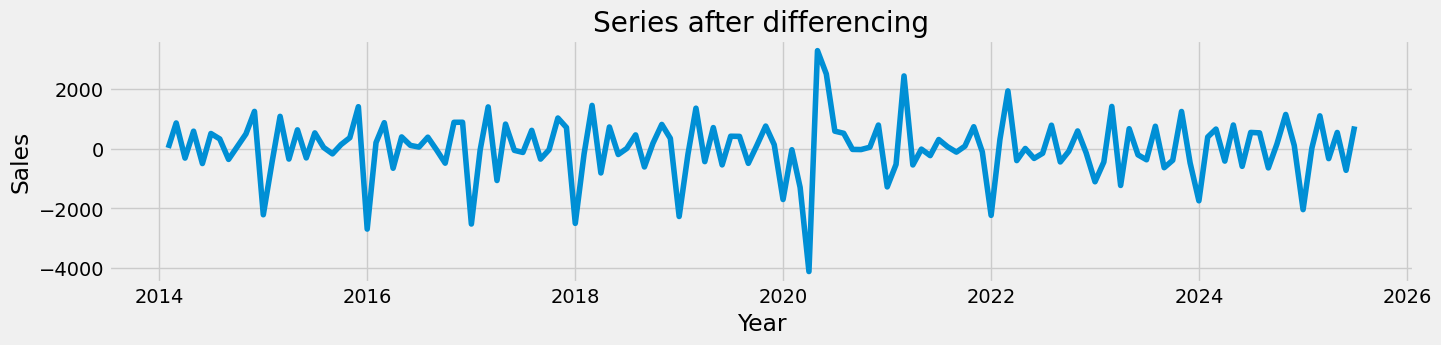

ADF Test Statistic: -3.6241695813652948
p-value: 0.005315418105016564
p-value is less than 0.05 hence given series is stationary


In [62]:
df1=df.copy()
df1["Sales"]=df1["Sales"].diff()
df1.dropna(inplace=True)
# plotting the sales trend over years
plt.figure(figsize=(15,3))
plt.plot(df1["Sales"])
plt.title("Series after differencing")
plt.xlabel("Year")
plt.ylabel("Sales")

plt.show()
# cheking if given series is stationary using ADF Test
check_stationarity(df1["Sales"])

### Univariate Time Series Models

Use PACF and ACF plots to find value of p and q.

We have already found value of d as 1 as we have differenced our series for 1st time to make series stationary.

Plot PACF and ACF to identify potential values for p (AR) and q (MA) parameters

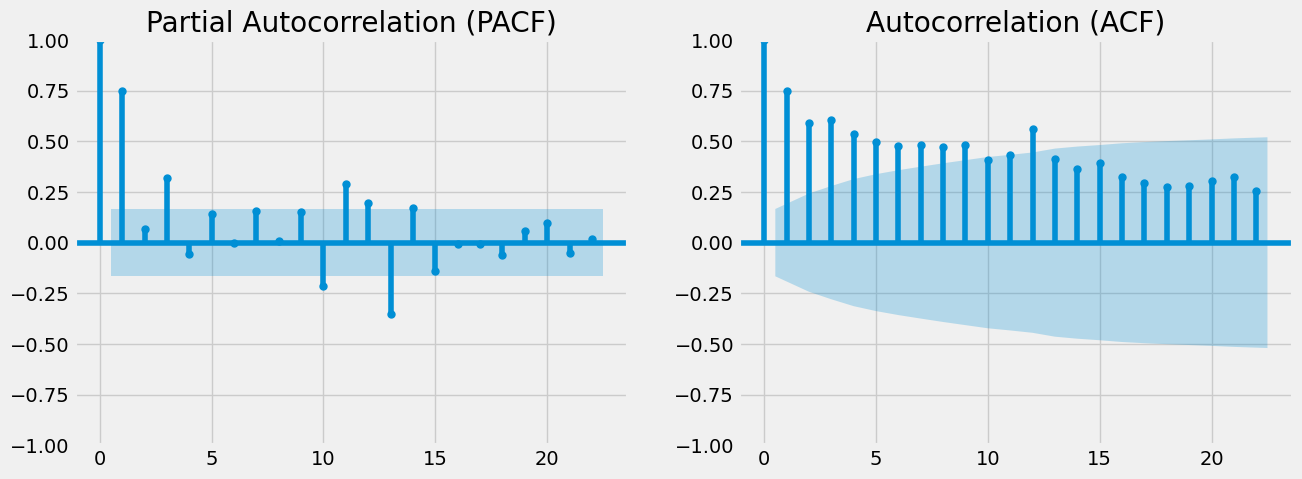

In [65]:
# import plot_acf,plot_pacf functions from statsmodels library
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# create a 1-row, 2-column subplot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# plot PACF on the first subplot
plot_pacf(df["Sales"], ax=ax[0])
ax[0].set_title("Partial Autocorrelation (PACF)")

# plot ACF on the second subplot
plot_acf(df["Sales"], ax=ax[1])
ax[1].set_title("Autocorrelation (ACF)")

plt.show()


### Model Building

In [67]:
train_df=df[:-12]
test_df=df[-12:]

### Building ARIMA Model on Training Data

In [70]:
from statsmodels.tsa.arima.model import ARIMA

#create instance of ARIMA  class
model_arima=ARIMA(train_df["Sales"],order=(1,1,1))
#build the ARIMA Model
model_fit=model_arima.fit()

C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [72]:
#summary function will help to have closer look at statistical values
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  127
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1040.288
Date:                Sat, 04 Oct 2025   AIC                           2086.575
Time:                        10:42:39   BIC                           2095.084
Sample:                    01-01-2014   HQIC                          2090.032
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4531      0.117      3.863      0.000       0.223       0.683
ma.L1         -0.8446      0.077    -10.926      0.000      -0.996      -0.693
sigma2      8.392e+05   6.32e+04     13.277      0.0

In [74]:
len(train_df),len(test_df)

(127, 12)

In [76]:
127+12


139

In [78]:
#forecasting the next 12 months
n_forecast =12

#Getting predictions for the forecast period(predictions for testing data)
predict = model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast-1)

#remaining series for clarity
predict.rename("predicted",inplace=True)
predict

2024-08-01    11039.585532
2024-09-01    10991.820430
2024-10-01    10970.177245
2024-11-01    10960.370346
2024-12-01    10955.926673
2025-01-01    10953.913168
2025-02-01    10953.000814
2025-03-01    10952.587411
2025-04-01    10952.400091
2025-05-01    10952.315214
2025-06-01    10952.276754
2025-07-01    10952.259327
Freq: MS, Name: predicted, dtype: float64

In [80]:
# creating new dataframe to store predictions
pred_df = pd.DataFrame(predict)

#remaining columns for clarity
pred_df.columns=["predicted_sales"]

#rounding off values to zero decimal places
pred_df["predicted_sales"]= round(pred_df["predicted_sales"],0)

pred_df

,predicted_sales
2024-08-01,11040.0
2024-09-01,10992.0
2024-10-01,10970.0
2024-11-01,10960.0
2024-12-01,10956.0
2025-01-01,10954.0
2025-02-01,10953.0
2025-03-01,10953.0
2025-04-01,10952.0
2025-05-01,10952.0


In [82]:
#creating new dataframe to store actual test data along with predictions by ARIMA model
actual_vs_pred=pd.concat([test_df,pred_df],axis=1)

#checking error in actual and predicted values
actual_vs_pred["error"]=actual_vs_pred["Sales"]-actual_vs_pred["predicted_sales"]

#remaining columns for clarity
actual_vs_pred.rename(columns={"Sales":"actual_sales"}, inplace=True)

actual_vs_pred

,actual_sales,predicted_sales,error
2024-08-01,11679.0,11040.0,639.0
2024-09-01,11038.0,10992.0,46.0
2024-10-01,11194.0,10970.0,224.0
2024-11-01,12345.0,10960.0,1385.0
2024-12-01,12455.0,10956.0,1499.0
2025-01-01,10414.0,10954.0,-540.0
2025-02-01,10444.0,10953.0,-509.0
2025-03-01,11549.0,10953.0,596.0
2025-04-01,11219.0,10952.0,267.0
2025-05-01,11766.0,10952.0,814.0


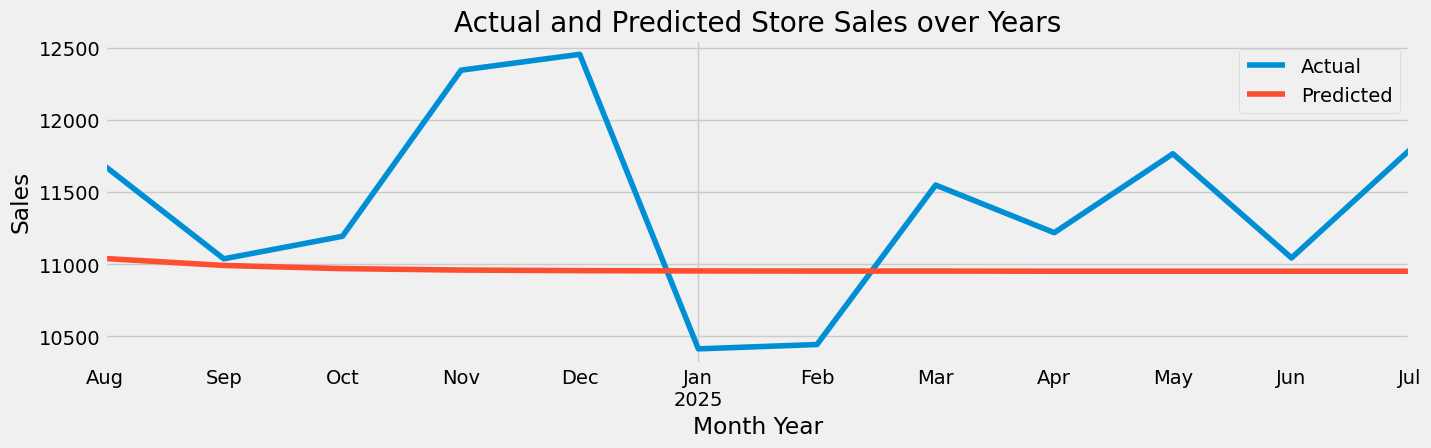

In [84]:
# plotting actual and predicted sales for test data for comparision
plt.figure(figsize=(15,4))
actual_vs_pred["actual_sales"].plot()
actual_vs_pred["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales over Years")
plt.xlabel("Month Year")
plt.ylabel("Sales")
plt.legend(["Actual","Predicted"])
plt.show()

In [2]:
# !pip uninstall -y numpy
# !pip uninstall -y tensorflow scipy pandas scikit-learn
# !pip install --no-cache-dir numpy==1.26.4
# !pip install --no-cache-dir tensorflow==2.16.1 scipy==1.14.1 pandas==2.2.2 scikit-learn==1.5.1
# !pip install pmdarima --no-cache-dir

#### Find optimal values of non seasonal and seasonal order with auto_arima function


In [99]:
pip install --force-reinstall --no-deps scipy==1.15.2

   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   --- ------------------------------------ 3.4/40.9 MB 18.3 MB/s eta 0:00:03
   ---- ----------------------------------- 4.5/40.9 MB 11.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/40.9 MB 9.1 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/40.9 MB 8.2 MB/s eta 0:00:05
   ------- -------------------------------- 8.1/40.9 MB 7.9 MB/s eta 0:00:05
   --------- ------------------------------ 9.4/40.9 MB 7.7 MB/s eta 0:00:05
   ----------- ---------------------------- 11.3/40.9 MB 7.7 MB/s eta 0:00:04
   ------------ --------------------------- 12.6/40.9 MB 7.4 MB/s eta 0:00:04
   --------------- ------------------------ 15.5/40.9 MB 7.8 MB/s eta 0:00:04
   ----------------- ---------------------- 17.6/40.9 MB 8.0 MB/s eta 0:00:03
   ------------------- -------------------- 19.7/40.9 MB 8.2 MB/s eta 0:00:03
   --------------------- ------------------ 22.0/40.9 MB 8.4 MB/s eta 0:00:0

In [103]:
# import auto_arima function from pmdarima library
from pmdarima import auto_arima

# passing non stationary data to auto_arima function
auto_arima_result=auto_arima(train_df["Sales"],seasonal=True,m=12)


In [104]:
# summary function will help to have a closer look at statistical values
print(auto_arima_result.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  127
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1012.187
Date:                              Sat, 04 Oct 2025   AIC                           2036.374
Time:                                      10:48:50   BIC                           2053.391
Sample:                                  01-01-2014   HQIC                          2043.288
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3311      1.601      0.207      0.836      -2.807       3.469
ma.L1         -0.08

In [105]:
#optional values of non-seasonal order and seasonal order
auto_arima_result.order,auto_arima_result.seasonal_order

((0, 1, 2), (1, 0, 1, 12))

#### Building SARIMAX Model on Training Data


In [112]:

# import SARIMAX class from statsmodels library
from statsmodels.tsa.statespace.sarimax import SARIMAX

# create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(train_df["Sales"],order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

# building SARIMAX model
model_fit=model_sarimax.fit()

C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [114]:
# time period in months for which we are forecasting sales
n_forecast=12

# predict function will return series with predicted values for testing data
pred_values=model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast-1)

# renaming columns for clarity
pred_values = pred_values.rename("predicted",inplace=True)

# creating new dataframe to store predicted values for test data
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2024-08-01,11707.0
2024-09-01,11257.0
2024-10-01,11218.0
2024-11-01,11738.0
2024-12-01,12106.0
2025-01-01,10554.0
2025-02-01,10488.0
2025-03-01,11468.0
2025-04-01,10641.0
2025-05-01,11331.0


In [118]:
# creating new dataframe to store actual test data along with predictions by SARIMAX model
actual_vs_pred_df=pd.concat([test_df,pred_df],axis=1)

# checking error in actual and predicted values
actual_vs_pred_df["error"]=actual_vs_pred_df["Sales"]-actual_vs_pred_df["predicted"]

# renaming columns for clarity
actual_vs_pred_df.rename(columns={"Sales": "actual_sales"}, inplace=True)
actual_vs_pred_df.rename(columns={"predicted": "predicted_sales"}, inplace=True)

actual_vs_pred_df

,actual_sales,predicted_sales,error
2024-08-01,11679.0,11707.0,-28.0
2024-09-01,11038.0,11257.0,-219.0
2024-10-01,11194.0,11218.0,-24.0
2024-11-01,12345.0,11738.0,607.0
2024-12-01,12455.0,12106.0,349.0
2025-01-01,10414.0,10554.0,-140.0
2025-02-01,10444.0,10488.0,-44.0
2025-03-01,11549.0,11468.0,81.0
2025-04-01,11219.0,10641.0,578.0
2025-05-01,11766.0,11331.0,435.0


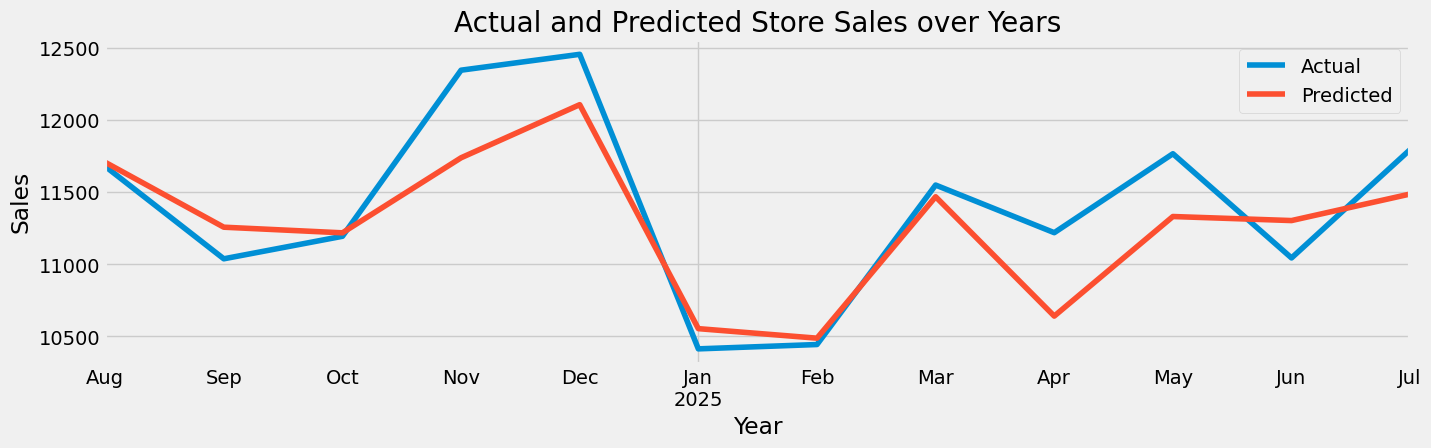

In [122]:
# plotting actual and predicted sales over year
plt.figure(figsize=(15,4))
actual_vs_pred_df["actual_sales"].plot()
actual_vs_pred_df["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(["Actual","Predicted"])
plt.show()

Actual and Predicted sales for test data are somewhat close to each other. SARIMAX Model is giving decent predictions. So try to build model on entire dataset,

In [127]:
# passing non stationary data to auto_arima functon
auto_arima_result=auto_arima(df["Sales"],seasonal=True,m=12)

In [129]:
auto_arima_result.order,auto_arima_result.seasonal_order

((2, 1, 2), (1, 0, 1, 12))

In [131]:
# summary function will help to have closer look at Statistical values
print (auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  139
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1108.539
Date:                              Sat, 04 Oct 2025   AIC                           2233.078
Time:                                      11:00:52   BIC                           2256.496
Sample:                                  01-01-2014   HQIC                          2242.594
                                       - 07-01-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9827      5.357      0.183      0.854      -9.518      11.483
ar.L1         -0.00

In [135]:
# create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(df["Sales"],order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

# building SARIMAX model
model_fit=model_sarimax.fit()

C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [137]:
# time period in months for which we are forecasting sales
n_forecast=12

# predict function will return series with predicted values
pred_values=model_fit.predict(start=len(df),end=len(df)+n_forecast-1)

# renaming columns for clarity
pred_values = pred_values.rename("predicted",inplace=True)

# creating new dataframe to store predicted values
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2025-08-01,12348.0
2025-09-01,11796.0
2025-10-01,11780.0
2025-11-01,12356.0
2025-12-01,12677.0
2026-01-01,11060.0
2026-02-01,11007.0
2026-03-01,12003.0
2026-04-01,11221.0
2026-05-01,11896.0


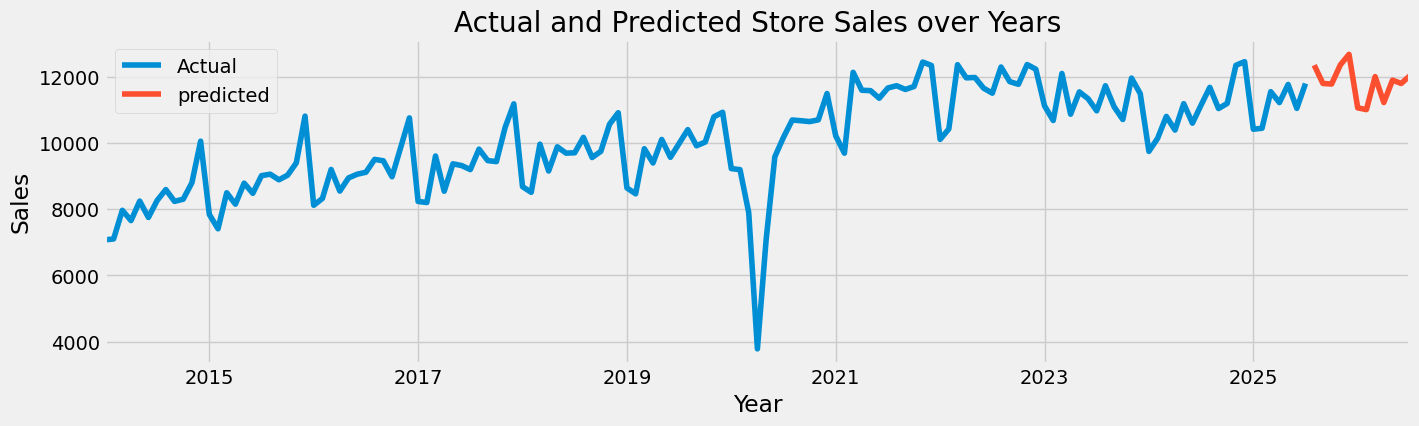

In [147]:
# plotting actual and predicted sales over year
plt.figure(figsize=(15,4))
df["Sales"].plot(legend=True,label="Actual")
pred_df["predicted"].plot(legend=True,label="predicted")
plt.title("Actual and Predicted Store Sales over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()